# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, Image

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="inner", on=["city", "city"])

# Create the DataFrames by city type.

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# 1. Total number of rides per city type
sum_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [46]:
# 2. Total drivers for each city type
driver_count_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
# 3. Total amount of fares for each city type
sum_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
# 4. Average fare per ride for each city type
avg_fares_by_city_type = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fares_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Average fare per driver for each city type
avg_fare_per_driver_per_city_type = sum_fares_by_city_type/driver_count_by_city_type
avg_fare_per_driver_per_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [47]:
# 6. Create a PyBer summary DataFrame

# Adding a list of values with keys to create a new DataFrame.

pyber_summary_df = pd.DataFrame({
            "Total Rides": sum_rides_by_city_type,
            "Total Drivers": driver_count_by_city_type,
            "Total Fares": sum_fares_by_city_type,
            "Average Fare per Ride": avg_fares_by_city_type,
            "Average Fare per Driver": avg_fare_per_driver_per_city_type})

In [9]:
# 7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
# 8. Format the columns.

# Format the Total Rides and Total Drivers to have the comma for a thousands separator.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

# Format Total Fares, Average Fare per Ride and Average Fare per Driver to have the comma for a thousands separator, a decimal separator, and a "$".
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
daily_fare_per_city_type = pyber_data_df.groupby(["type","date"]).sum()["fare"]
dfpct_df = pd.DataFrame(daily_fare_per_city_type)
dfpct_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [12]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# pyber_data_df = pyber_data_df.reset_index(["date"])

dfpct_df2 = dfpct_df.reset_index()
dfpct_df2['date'] = pd.to_datetime(dfpct_df2['date'])

dfpct_df2

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [13]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
daily_fares_df = dfpct_df2.pivot(index='date', columns='type', values='fare')
daily_fares_df.sort_index(inplace=True, ascending=True)

daily_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [14]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

df_df = daily_fares_df.loc["2019-01-01 00:00:00":"2019-04-30 00:00:00"]
df_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [15]:
# 13. Set the "date" index to datetime datatype. 
# This is necessary to use the resample() method in Step 8.

df_df.index = pd.to_datetime(df_df.index)

In [16]:
# 14. Check that the datatype for the index is datetime using df.info()
df_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [19]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df2_df = df_df.resample('1W').sum()
df2_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


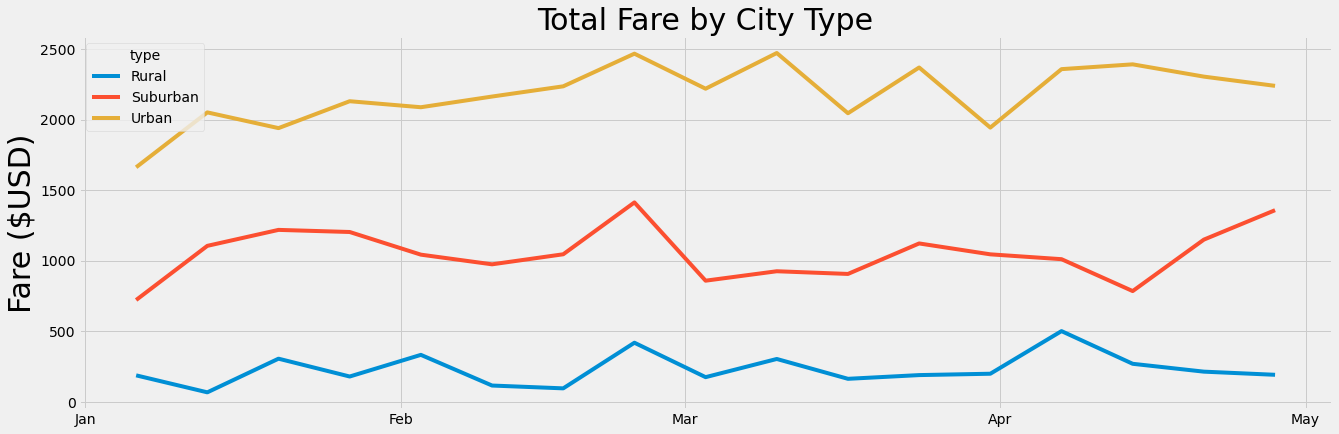

In [45]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
import datetime
from matplotlib import style
import matplotlib.dates as mdates

months = mdates.MonthLocator()

df3_df = df2_df["2019-01-06":"2019-04-29"]

# Plot the data.
fig, ax = plt.subplots(figsize=(20, 6.4))
ax.plot(df3_df)

#Add a label to the y-axis.
ax.set_ylabel('Fare ($USD)',fontsize=30)

# Specify the format - %b gives us Jan, Feb...
locator = mdates.MonthLocator()  # every month
X = plt.gca().xaxis
X.set_major_locator(locator)

ax.xaxis.set_major_locator(months)
fmt = mdates.DateFormatter('%b')
X.set_major_formatter(fmt)

#Add a title.
ax.set_title("Total Fare by City Type",fontsize=30)

#Add a legend.
ax.legend(df3_df, title="type")

#Add a grid to the chart.
#ax.grid()

#Saves the figure with the given extension. Added at the end of your script.
#** plt.savefig("add a path and figure extension")

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html">Documentation: pandas.DataFrame.resample</a>

<a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects">Documentation: DateOffset objects</a>